In [53]:
# import necerssary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
dataSet = pd.read_csv('spamData.csv')
dataSet

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4206,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4207,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4208,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataSet)

In [56]:
new_data=pd.DataFrame(data=scaled_data, columns= dataSet.columns)

In [57]:
new_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4.210000e+03,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4210.000000,4.210000e+03,...,4210.000000,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4210.000000
mean,4.725700e-17,1.350200e-17,2.700400e-17,0.000000,4.050600e-17,-1.350200e-17,0.000000,-1.350200e-17,0.000000,-8.776300e-17,...,0.000000,-6.751000e-18,1.350200e-17,-2.700400e-17,-2.700400e-17,2.700400e-17,-1.350200e-17,-1.350200e-17,-2.700400e-17,0.000000
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119,1.000119e+00,...,1.000119,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119
min,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.322705e-01,-2.562653e-01,-4.691088e-01,-0.814478
25%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.133376e-01,-2.261989e-01,-4.060613e-01,-0.814478
50%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-0.160010,-2.590883e-01,-1.643641e-01,-3.144319e-01,-3.173253e-01,-1.050711e-01,-9.313751e-02,-1.861104e-01,-3.066403e-01,-0.814478
75%,-3.479216e-01,-2.480275e-01,2.880349e-01,-0.046644,1.231299e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-8.897950e-02,...,-0.160010,1.821569e-01,-1.643641e-01,5.913558e-02,-9.619715e-02,-1.050711e-01,-5.060267e-02,-4.078958e-02,-2.818053e-02,1.227780
max,1.478696e+01,3.119145e+01,9.325045e+00,31.609920,1.406769e+01,2.095434e+01,18.005710,2.681886e+01,18.319574,2.731139e+01,...,17.206130,3.503689e+01,3.843832e+01,3.818318e+01,2.472857e+01,4.538756e+01,3.310208e+01,4.979423e+01,2.513787e+01,1.227780


In [58]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(new_data)

In [59]:
pca = PCA(n_components=44)
new_data = pca.fit_transform(new_data)

# This will be the new data fed to the algorithm.
new_data = pd.DataFrame(data = new_data
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                         'PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                         'PC41','PC42','PC43','PC44'])

In [60]:
new_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-0.959817,0.409752,-0.704545,0.052585,-0.291080,-0.308256,-0.092949,0.363294,1.748443,0.043181,...,0.349285,0.472071,0.012460,0.122556,0.188204,0.228785,0.291804,0.218086,-0.329950,0.353283
1,-1.577178,2.119988,0.145692,-0.495845,0.055140,-1.146038,-0.554535,0.248702,-0.300308,0.688455,...,-0.261813,-0.189335,-0.374100,-0.155646,-0.001985,0.264586,0.365352,0.524302,0.076170,0.357605
2,-2.027954,4.587613,3.385692,-1.135534,1.773831,-1.325062,-3.197416,-1.352819,1.004545,-2.296430,...,2.072379,-0.471999,-0.493311,-0.222458,-0.435078,0.943008,0.781114,0.294272,0.141044,-0.905786
3,-1.069770,0.743181,-0.596264,-0.016843,-0.169360,0.719542,0.345585,-0.442175,-0.370736,-0.241415,...,0.327228,0.226905,0.061462,0.313896,-0.388613,0.537551,0.705759,-0.734290,0.310895,-0.313951
4,-1.070583,0.742523,-0.598405,-0.017111,-0.169386,0.720101,0.343861,-0.443497,-0.371067,-0.240635,...,0.326569,0.228114,0.062622,0.314364,-0.388503,0.537925,0.705026,-0.732629,0.310825,-0.313282


In [61]:
print(pca.explained_variance_)

[6.34931299 3.59100245 2.02185181 1.6296761  1.55865579 1.47438283
 1.41600714 1.36783958 1.2948723  1.25870971 1.2407883  1.16188655
 1.14582516 1.10619754 1.0985261  1.06509044 1.05384593 1.02936445
 1.01684674 1.00179592 0.98026719 0.96917914 0.9533051  0.94498246
 0.93879685 0.91869361 0.90733519 0.89579305 0.87387862 0.86533369
 0.83264893 0.82194599 0.81026294 0.80462151 0.78871989 0.76101886
 0.75976872 0.74218988 0.72770352 0.70561162 0.68256323 0.67045656
 0.63898456 0.63138406]


In [62]:
print(pca.components_)

[[-0.0521765  -0.02532573 -0.05860722 ... -0.04370143 -0.05888209
  -0.16243724]
 [ 0.11983768  0.09668134  0.1255677  ...  0.20154013  0.17812635
   0.35399978]
 [-0.01555938 -0.01189913 -0.0180494  ...  0.4789995   0.40099537
  -0.06400162]
 ...
 [-0.14618855  0.17383273  0.00283948 ...  0.07296283  0.46824595
   0.02266176]
 [ 0.14370795  0.08506969  0.07103557 ...  0.02747162  0.11934039
   0.03790271]
 [ 0.13168421 -0.30075225  0.00549222 ... -0.0391303   0.30529724
   0.11355372]]


Scree plot

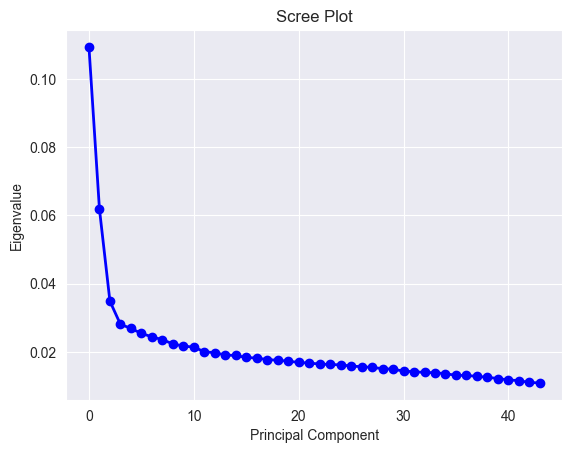

In [63]:
plt.plot((np.arange(pca.n_components_)),pca.explained_variance_ratio_,"bo-",linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

Variance Explanation plot

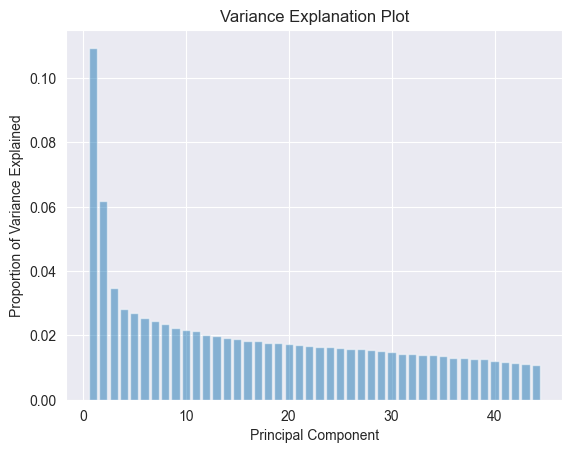

In [64]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,alpha=0.5,align="center")
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Variance Explanation Plot')
plt.show()

Cumulative variance plot

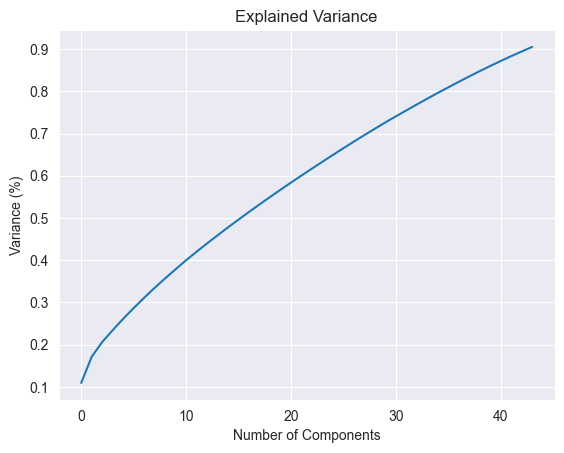

In [65]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

KNN

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
x = scaler.fit_transform(new_data)
x[0:5]

array([[-3.80957574e-01,  2.16254164e-01, -4.95548046e-01,
         4.11968135e-02, -2.33178426e-01, -2.53897095e-01,
        -7.81202028e-02,  3.10665134e-01,  1.53670165e+00,
         3.84932147e-02,  4.13971660e-01,  7.52455884e-02,
         1.56116393e-01,  3.58216772e-01,  2.22276988e-01,
        -1.03296661e-01, -2.90979041e-01, -1.68995595e-01,
         2.64428657e-03, -1.29943979e-01,  7.34940457e-02,
        -1.84855915e-01,  9.19737648e-01,  3.63664878e-01,
        -1.15990495e+00,  2.45218309e-01, -4.75387117e-01,
        -5.43735802e-02, -1.92444089e-01,  3.79392162e-01,
        -1.17233802e-01,  2.22198530e-01, -3.40613773e-01,
        -4.02906393e-01,  3.93342359e-01,  5.41204191e-01,
         1.42968326e-02,  1.42274641e-01,  2.20649062e-01,
         2.72393488e-01,  3.53241152e-01,  2.66375330e-01,
        -4.12814256e-01,  4.44658818e-01],
       [-6.25992345e-01,  1.11886373e+00,  1.02473916e-01,
        -3.88460596e-01,  4.41718662e-02, -9.43942546e-01,
        -4.66

In [68]:
y = dataSet.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [70]:
x_train.shape

(3368, 44)

In [71]:
x_test.shape

(842, 44)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15, metric="minkowski")
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [73]:
correct_sum = []
for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    correct = np.sum(pred==y_test)
    correct_sum.append(correct)

In [74]:
results = pd.DataFrame(data=correct_sum)
results.index = results.index+1
results.T

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,777,769,781,777,780,775,777,773,772,766,...,764,767,765,765,767,767,765,764,760,758


In [75]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
accuracy

0.9002375296912114

In [76]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[490,  26],
       [ 58, 268]], dtype=int64)

Text(77.92222222222227, 0.5, 'predicted class')

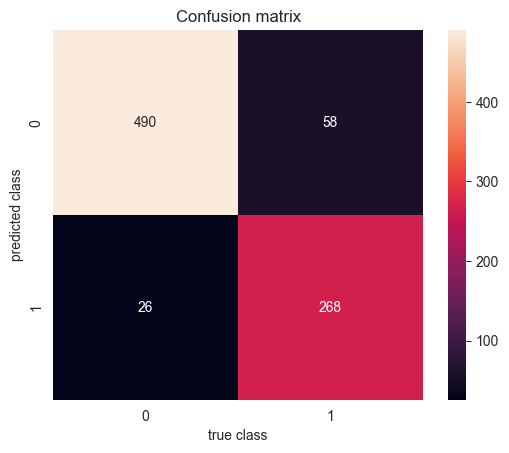

In [77]:
# based on test values generate the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Summary of the predictions made by the classifier
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

In [78]:
# Generate summary of the prediction (Classification Report) made by the classifier
from sklearn.metrics import classification_report

print('Classification Report : \n\n')
print(classification_report(y_test,pred))

Classification Report : 


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       516
           1       0.91      0.82      0.86       326

    accuracy                           0.90       842
   macro avg       0.90      0.89      0.89       842
weighted avg       0.90      0.90      0.90       842

